In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import nltk
import networkx as nx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
not_needed = ['AU', 'BA', 'BF', 'CA', 'GP', 'BE', 'SE', 'BS', 'CT', 'CY' ,'CL', 'SP', 'HO', 'RP', 'EM', 
              'RI', 'OI', 'FX', 'TC', 'U1', 'U2', 'PI', 'PA', 'SN', 'EI', 'BN', 'ID', 'J9', 'VL', 'IS', 
              'SI', 'PN', 'SU', 'MA', 'BP', 'EP', 'AR', 'DI', 'D2', 'EA', 'GA', 'PM', 'UT', 'OA', 'HP',
              'HC', 'DA'] 

def to_df(directory, not_needed=not_needed):
    file_names = os.listdir(directory)
    data_frames = [pd.read_csv(directory+file_name, sep='\t',  engine='c', index_col=False, quotechar='^') for file_name in file_names] 
    print('Checking duplicates...')
    all_clear = True
    for i in range(len(data_frames)):
        for j in range(i+1, len(data_frames)):
            if str(data_frames[i].iloc[0,:]) == str(data_frames[j].iloc[0,:]):
                print('Duplicated dataframes:' + str(file_names[i]) +', '+str(file_names[j]))
                all_clear = False
    if all_clear:
        print('All clear')
    else:
        print('Check the files')
        
    concatenated = pd.concat(data_frames, ignore_index=True)
    if not_needed:
        concatenated.drop(columns=not_needed, inplace=True)
    concatenated.drop_duplicates(inplace=True)
    return concatenated

In [ ]:
data = to_df('/content/drive/MyDrive/data/')

Checking duplicates...
All clear


In [ ]:
data.to_excel("data.xlsx")

In [ ]:
data = pd.read_excel('data.xlsx', usecols=range(1,30))

In [ ]:
mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data.PD = data.PD.str[:3].str.capitalize()
data_w_date = data[data.PD.isin(mon)].copy()
data_w_date.PD = data_w_date.PD.apply(lambda x: datetime.strptime(x,'%b').strftime('2020-%m'))

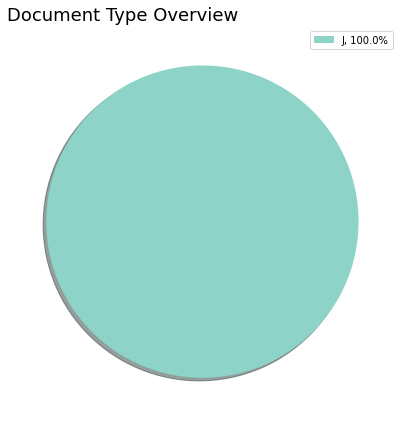

In [ ]:
data_doc = data.PT.dropna().str.split(';').apply(lambda x: x[0]).value_counts().rename_axis('DocType').reset_index(name='Count')

with plt.style.context({'axes.prop_cycle' : plt.cycler('color', plt.cm.Set3.colors)}):
    fig1, ax1 = plt.subplots(figsize=(6, 6))
    labels = data_doc.iloc[:,0]
    size = data_doc.iloc[:,1]/data_doc.iloc[:,1].sum()*100
    ax1.pie(data_doc.iloc[:,1], startangle=90, shadow=True)
    ax1.legend(labels =['%s, %1.1f%%' % (l,s) for l,s in zip(labels,size)])
    ax1.set_title('Document Type Overview', fontsize=18, loc='left')
    plt.tight_layout()
    plt.savefig('doc_type.jpg')
    plt.show()


# By language

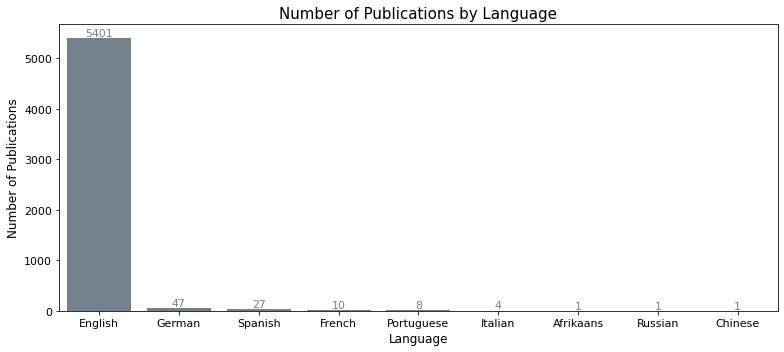

In [ ]:
data_lang = data.LA.dropna().value_counts().rename_axis('Language').reset_index(name='Count')[0:10]

plt.figure(figsize=(11,5))
g = sns.barplot(x=data_lang.Language, y=data_lang.Count, color='slategrey')
plt.xlabel('Language',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
for p in g.patches:
             g.annotate("%1.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='slategrey',xytext=(0, 5), textcoords='offset points')
plt.title('Number of Publications by Language', fontsize=15)
plt.tight_layout()
plt.savefig('doc_lang.jpg')
plt.show()

# By source

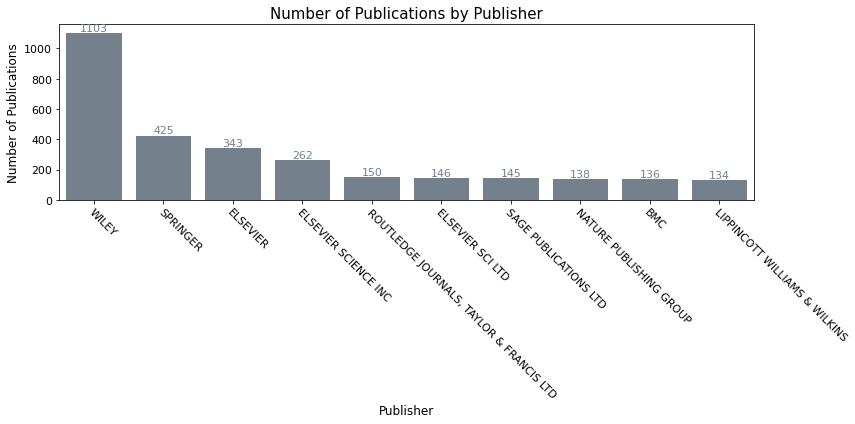

In [ ]:
data_publisher = data.PU.dropna().value_counts().rename_axis('Title').reset_index(name='Count')[0:10]

plt.figure(figsize=(12,6))
g=sns.barplot(x=data_publisher.Title, y=data_publisher.Count, color='slategrey')
plt.xlabel('Publisher',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11, rotation = -45, ha='left', rotation_mode='anchor')
plt.yticks(fontsize=11)
for p in g.patches:
             g.annotate("%1.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='slategrey',xytext=(0, 5), textcoords='offset points')
plt.title('Number of Publications by Publisher', fontsize=15)
plt.tight_layout()
plt.savefig('doc_publisher.jpg')
plt.show()

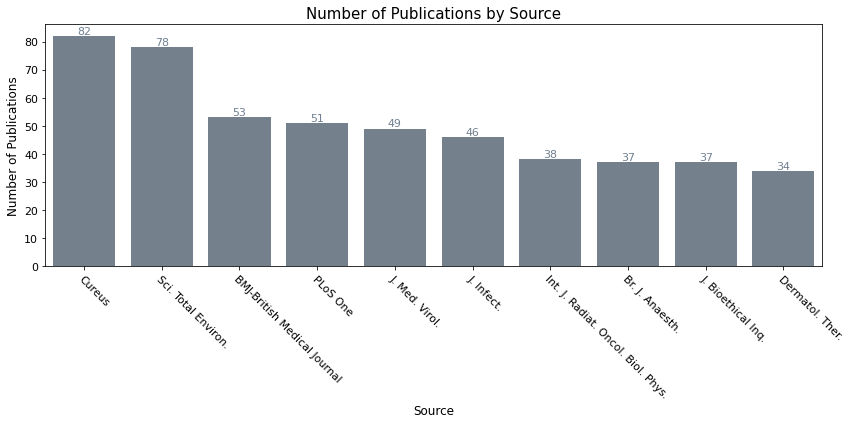

In [ ]:
data_source = data.JI.dropna().value_counts().rename_axis('Title').reset_index(name='Count')[0:10]

plt.figure(figsize=(12,6))
g=sns.barplot(x=data_source.Title, y=data_source.Count, color='slategrey')
plt.xlabel('Source',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11, rotation = -45, ha='left', rotation_mode='anchor')
plt.yticks(fontsize=11)
for p in g.patches:
             g.annotate("%1.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='slategrey',xytext=(0, 5), textcoords='offset points')
plt.title('Number of Publications by Source', fontsize=15)
plt.tight_layout()
plt.savefig('doc_source.jpg')
plt.show()

# Number of pages


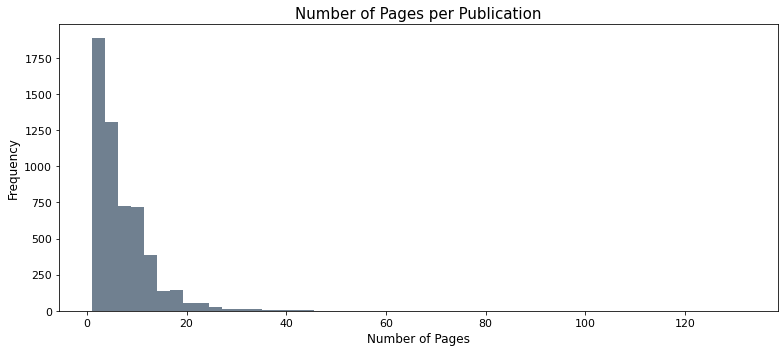

In [ ]:
data_page = data.PG.dropna()

plt.figure(figsize=(11,5))
plt.hist(x=data_page, color='slategrey', bins=50)
plt.xlabel('Number of Pages',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Number of Pages per Publication', fontsize=15)
plt.tight_layout()
plt.savefig('doc_page.jpg')
plt.show()

# By institution

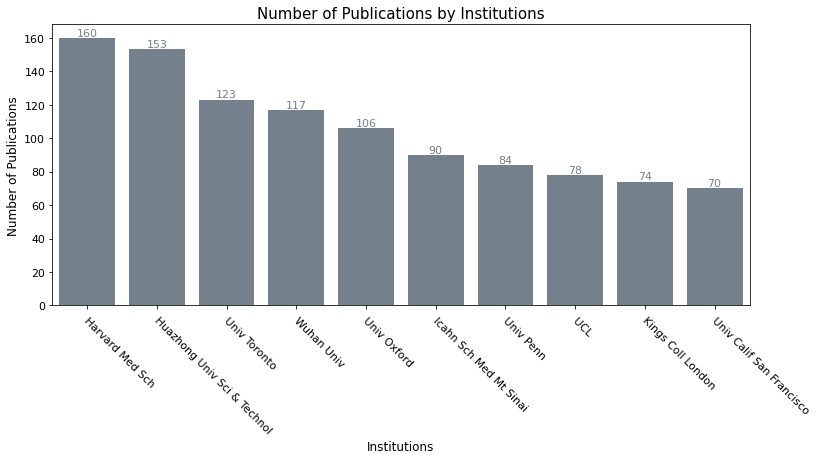

In [ ]:
data_inst = data[['C1']].dropna()
data_inst.C1= data_inst.C1.apply(lambda x: re.findall(r"\](.*?)\,", x))
data_inst_all = data_inst.explode('C1').C1.value_counts().rename_axis('Institutions').reset_index(name='Count')[0:10]

plt.figure(figsize=(11.5,6.5))
g=sns.barplot(x=data_inst_all.Institutions, y=data_inst_all.Count, color='slategrey')
plt.xlabel('Institutions',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11, rotation = -45, ha='left', rotation_mode='anchor')
plt.yticks(fontsize=11)
for p in g.patches:
             g.annotate("%1.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='slategrey',xytext=(0, 5), textcoords='offset points')

plt.title('Number of Publications by Institutions', fontsize=15)
plt.tight_layout()
plt.savefig('doc_inst.jpg')
plt.show()

# By country

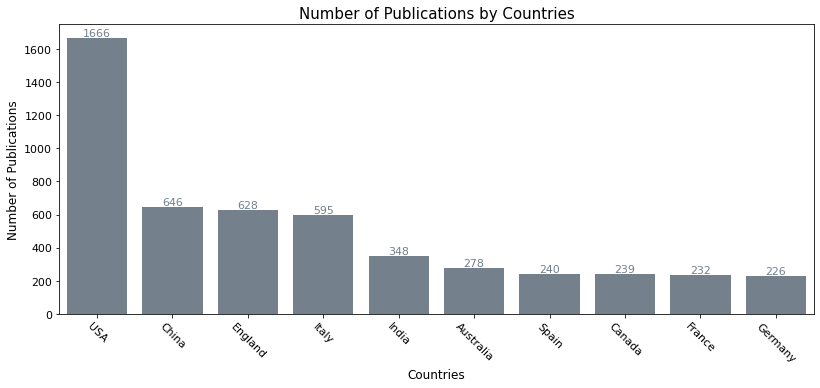

In [ ]:
data_country = data[['C1']].dropna()
data_country.C1 = data_country.C1.apply(lambda x: re.sub(r"\[(.*?)\]", "", x).split('; ')).to_list()
data_country['country']=[list(set(i)) for i in [[j.split()[-1] for j in i] for i in data_country.C1]] 
data_country_all = data_country.explode('country')['country'].value_counts().rename_axis('Countries').reset_index(name='Count')
data_country_10 = data_country_all[0:10]

plt.figure(figsize=(11.5,5.5))
g=sns.barplot(x=data_country_10.Countries, y=data_country_10.Count, color='slategrey')
plt.xlabel('Countries',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11, rotation = -45)
plt.yticks(fontsize=11)
for p in g.patches:
             g.annotate("%1.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='slategrey',xytext=(0, 5), textcoords='offset points')

plt.title('Number of Publications by Countries', fontsize=15)
plt.tight_layout()
plt.savefig('doc_country.jpg')
plt.show()

In [ ]:
country_distr_map=data_country_all.to_excel('country_distr_map.xlsx')

# By research area

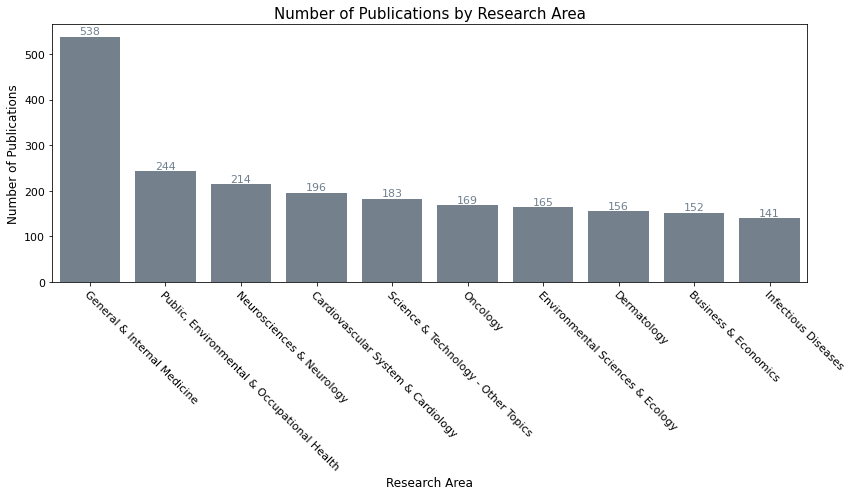

In [ ]:
data_research = data[['SC']].dropna()
data_research.SC = data_research.SC.str.split(';')
data_research_all = data_research.explode('SC').SC.value_counts().rename_axis('ResArea').reset_index(name='Count')[:10]

plt.figure(figsize=(12,7))
g=sns.barplot(x=data_research_all.ResArea, y=data_research_all.Count, color='slategrey')
plt.xlabel('Research Area',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11, rotation = -45, ha='left', rotation_mode='anchor')
plt.yticks(fontsize=11)
for p in g.patches:
             g.annotate("%1.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='slategrey',xytext=(0, 5), textcoords='offset points')

plt.title('Number of Publications by Research Area', fontsize=15)
plt.tight_layout()
plt.savefig('doc_research.jpg')
plt.show()

# By author keyword

In [ ]:
data_keywords=data[['DE']].dropna()
data_keywords.DE = data_keywords.DE.str.split('; ')
data_keywords_full = data_keywords.explode('DE').DE.str.lower().value_counts().rename_axis('Author Keywords').reset_index(name='Count')
data_keywords_full.head(20)


,Author Keywords,Count
0,covid-19,2236
1,sars-cov-2,733
2,coronavirus,451
3,pandemic,277
4,mortality,65
5,telemedicine,63
6,coronavirus disease 2019,62
7,covid-19 pandemic,60
8,covid,55
9,public health,54


# Author table

In [ ]:
data_author = data[['AF']].dropna()
data_author = data_author.loc[data_author.AF != '[Anonymous]']
data_author.AF = data_author.AF.str.split(';')
data_author_all = data_author.explode('AF').AF.value_counts().rename_axis('AF').reset_index(name='Number of papers')

author_cited = data[['AF','Z9','SC']].dropna()
author_cited = author_cited.loc[author_cited.AF != '[Anonymous]']
author_cited.AF = author_cited.AF.str.split(';')
author_cited_all = author_cited.explode('AF').sort_values('Z9', ascending=False).drop(columns = 'SC').reset_index().drop(columns = 'index')
author_cited_all = author_cited_all[['AF', 'Z9']]
au_ci = author_cited_all.groupby('AF').sum().sort_values('Z9', ascending=False)
au_ci_1 = author_cited_all.groupby('AF').count().reset_index().rename(columns={'Z9':'Count'})
au_ci_per = pd.merge(au_ci, au_ci_1, on='AF', how='inner')
au_ci_per['Number cited per paper'] = au_ci_per['Z9']/au_ci_per['Count']
au_ci_per = au_ci_per.drop(columns=['Z9', 'Count']).sort_values('Number cited per paper', ascending=False)

author_tb = pd.merge(data_author_all, au_ci, on='AF', how='inner').dropna()
author_tb['cited per paper'] = author_tb.Z9/author_tb['Number of papers']
author_tb = author_tb[['AF', 'Z9', 'cited per paper', 'Number of papers']]
author_tb.sort_values(by=['Z9', 'cited per paper', 'Number of papers'], ascending=False).reset_index(drop=True).head(20)

,AF,Z9,cited per paper,Number of papers
0,"Baric, Ralph S.",79,26.333333,3
1,"Tostanoski, Lisa H.",68,34.000000,2
2,"Velasco, Jason",68,34.000000,2
3,"Blade, Kelvin",68,34.000000,2
4,"Maxfield, Lori F.",68,34.000000,2
5,"Li, Zhenfeng",68,34.000000,2
6,"Brown, Renita",68,34.000000,2
7,"Nkolola, Joseph P.",68,34.000000,2
8,"Cook, Anthony",68,34.000000,2
9,"Liu, Jinyan",68,34.000000,2


# Most cited papers

In [ ]:
data[['TI', 'SC', 'Z9']].dropna().sort_values('Z9', ascending=False).reset_index(drop=True).head(10)

,TI,SC,Z9
0,Acute Pulmonary Embolism Associated with COVID...,"Radiology, Nuclear Medicine & Medical Imaging",52
1,Acute Pulmonary Embolism in Patients with COVI...,"Radiology, Nuclear Medicine & Medical Imaging",50
2,COVID-19: Abnormal liver function tests,Gastroenterology & Hepatology,43
3,DNA vaccine protection against SARS-CoV-2 in r...,Science & Technology - Other Topics,42
4,Pulmonary Arterial Thrombosis in COVID-19 With...,General & Internal Medicine,35
5,Effect of lockdown amid COVID-19 pandemic on a...,Environmental Sciences & Ecology,34
6,Does SARS-Cov-2 invade the brain? Translationa...,Neurosciences & Neurology,33
7,Diagnostic Performance of CT and Reverse Trans...,"Radiology, Nuclear Medicine & Medical Imaging",30
8,Emergence of genomic diversity and recurrent m...,Infectious Diseases,27
9,Guidelines for Laboratory Diagnosis of Coronav...,Medical Laboratory Technology,26


# Number of authors per paper (-anonymous)

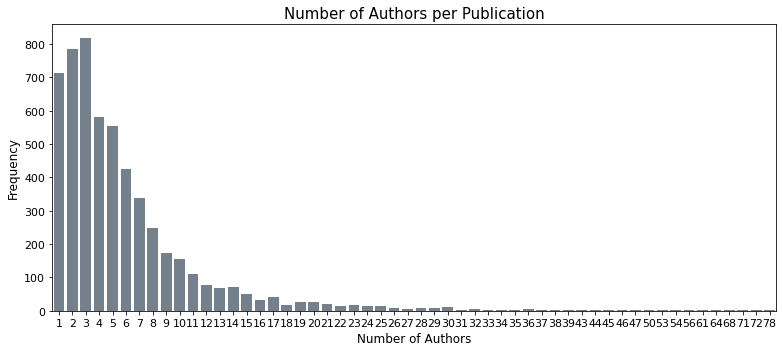

In [ ]:
data_author_wo_anony = data_author.loc[data_author.AF != '[Anonymous]']
author_per_ppr = data_author_wo_anony.AF.apply(lambda x: len(x))
author_per_ppr_df = author_per_ppr.value_counts().rename_axis('Number of Authors').reset_index(name='Count').sort_values('Number of Authors')

plt.figure(figsize=(11,5))
g=sns.barplot(x=author_per_ppr_df['Number of Authors'],y=author_per_ppr_df['Count'], color='slategrey')
plt.xlabel('Number of Authors',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Number of Authors per Publication', fontsize=15)
plt.tight_layout()
plt.savefig('author_per_ppr.jpg')
plt.show()

# Top 10 sponsors

In [ ]:
funding_top10= data[['FU']].dropna()
funding_top10['FU'].value_counts().rename_axis('Founding Organizations').reset_index(name='Count').head(10)

,Founding Organizations,Count
0,Projekt DEAL,28
1,"Italian Ministry of HealthMinistry of Health, ...",3
2,Basic Science Research Program through the Nat...,2
3,SIU Central Office,2
4,Beijing Social Science Fund [19GLC074]; Fundam...,2
5,HCA Healthcare,2
6,Projekt Deal,2
7,NovartisNovartis,2
8,National Institute for Health Research (NIHR) ...,2
9,Department of Science and Technology-SERB-ECR-...,2


# By month

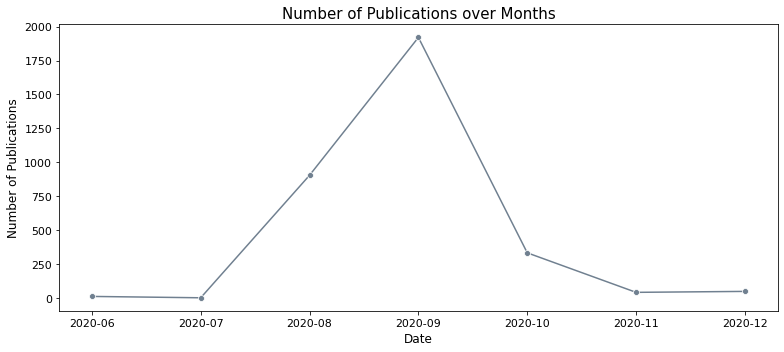

In [ ]:
date_count = data_w_date.sort_values(by = 'PD').groupby('PD').size().rename_axis('Date').reset_index(name='Count')
plt.figure(figsize=(11,5))
g=sns.lineplot(x=date_count.Date, y=date_count.Count, color='slategrey', marker='o')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Number of Publications over Months', fontsize=15)
plt.tight_layout()
plt.savefig('date_count.jpg')
plt.show()

# By country over month

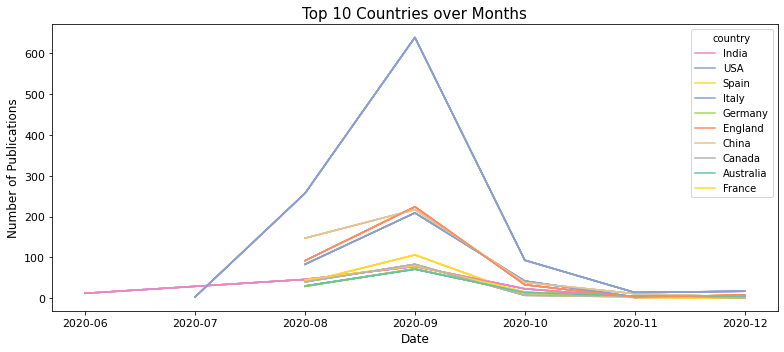

In [ ]:
country_month = data_w_date[['C1', 'PD']].dropna()
country_month.C1 = country_month.C1.apply(lambda x: re.sub(r"\[(.*?)\]", "", x).split('; ')).to_list()
country_month['country']=[list(set(i)) for i in [[j.split()[-1] for j in i] for i in country_month.C1]]                                                      
country_month_all = country_month.explode('country').drop(columns='C1')
country_month_all['num']=1
country_month_10 = country_month_all[country_month_all['country'].isin(data_country_10['Countries'].to_list())].groupby(['PD','country']).count().reset_index()

plt.figure(figsize=(11,5))
sns.lineplot(x=country_month_10['PD'], y=country_month_10['num'], hue=country_month_10['country'],
            hue_order=country_month_10.sort_values(by=['PD'])['country'].tolist(),
            palette='Set2')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Top 10 Countries over Months', fontsize=15)
plt.tight_layout()
plt.savefig('country_month_10.jpg')
plt.show()


# Source over month

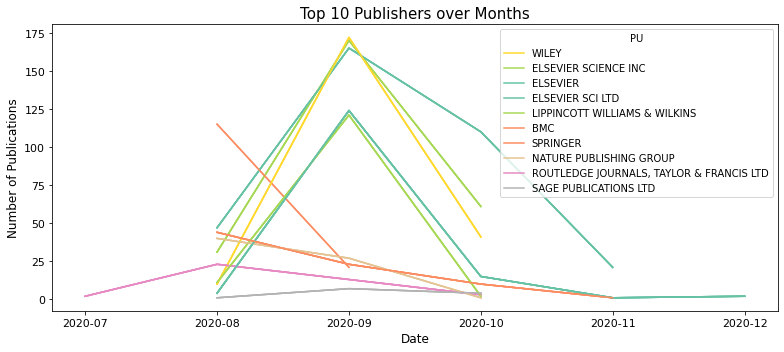

In [ ]:
pub_month = data_w_date[['PU', 'PD']].dropna()
pub_month['Number']=1
pub_month_count_10 = pub_month[pub_month['PU'].isin(data_publisher['Title'].to_list())].groupby(['PD','PU']).count().reset_index()

plt.figure(figsize=(11,5))
sns.lineplot(x=pub_month_count_10['PD'], y=pub_month_count_10['Number'], hue=pub_month_count_10['PU'],
            hue_order=pub_month_count_10.sort_values(by=['Number'], ascending=False)['PU'].tolist(),
            palette='Set2')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Top 10 Publishers over Months', fontsize=15)
plt.tight_layout()
plt.savefig('publisher_month.jpg')
plt.show()

# Research area over month

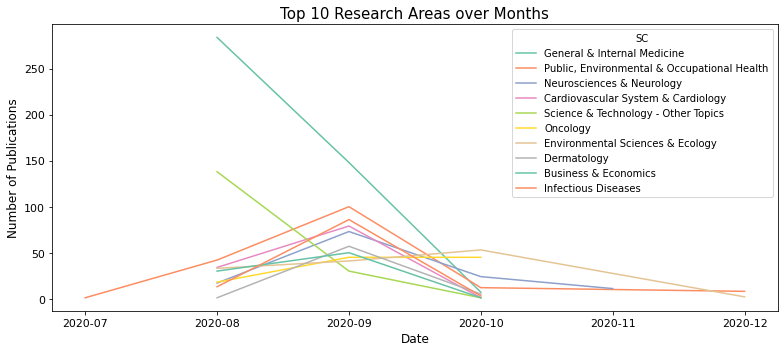

In [ ]:
research_month = data_w_date[['SC','PD']].dropna()
research_month['SC'] = research_month['SC'].str.split(';')
research_month_all = research_month.explode('SC')
research_month_all['num']=1
research_month_10 = research_month_all[research_month_all.SC.isin(data_research_all['ResArea'].to_list())].groupby(['PD','SC']).count().reset_index()

plt.figure(figsize=(11,5))
sns.lineplot(x=research_month_10['PD'], y=research_month_10['num'], 
             hue=research_month_10['SC'],
            hue_order=data_research_all['ResArea'].to_list(),
            palette='Set2')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Top 10 Research Areas over Months', fontsize=15)
plt.tight_layout()
plt.savefig('research_month.jpg')
plt.show()


# Keyword viz

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string
import nltk

In [ ]:
from wordcloud import WordCloud
import string

In [ ]:
def get_full_keywords(data_selected):
    data_selected['tok_title'] = [word_tokenize(title) for title in data_selected['TI']]
    data_selected['tok_abstract'] = [word_tokenize(title) for title in data_selected['AB']]
    stop_words=set(stopwords.words("english")+list(string.punctuation)+list(string.digits))
    data_selected['text']=data_selected['tok_title']+data_selected['tok_abstract']
    
    filtered_texts=[]
    for t in data_selected['text']:
        filtered_text=[]
        for word in t:
            if word.lower() not in stop_words:
                filtered_text.append(word)
        filtered_texts.append(filtered_text)

    keywords_text = [[item.lower() for item in sublist] for sublist in filtered_texts]
    kl = [x for sub in keywords_text for x in sub]
    
    keys_dist_20 = Counter(kl)
    return keys_dist_20

In [ ]:
cloud = data[['TI','AB']].dropna()
key_freq = get_full_keywords(cloud)

In [ ]:
key_freq.most_common(20)

[('covid-19', 11831),
 ('patients', 5991),
 ('pandemic', 3980),
 ('disease', 2965),
 ('sars-cov-2', 2903),
 ('coronavirus', 2739),
 ('health', 2325),
 ('study', 2135),
 ('infection', 1926),
 ('clinical', 1802),
 ('2020', 1750),
 ('severe', 1734),
 ('results', 1699),
 ('care', 1623),
 ('risk', 1547),
 ('2019', 1533),
 ('respiratory', 1529),
 ('may', 1374),
 ('data', 1362),
 ('cases', 1266)]

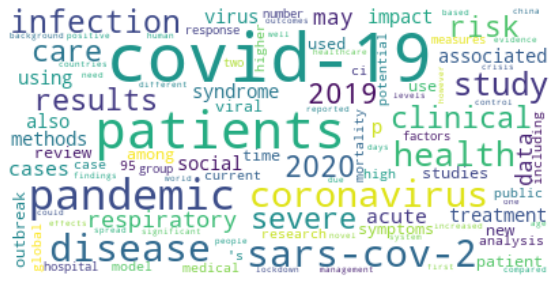

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate_from_frequencies(key_freq)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Corr

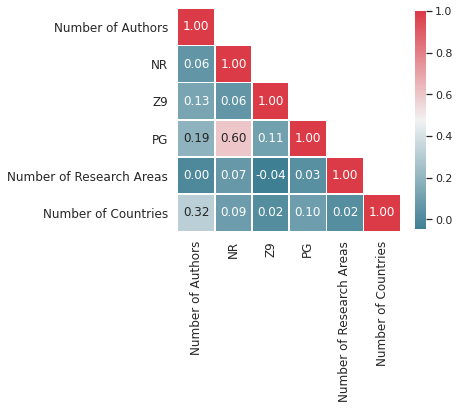

In [ ]:
corr_ana = data[['AF', 'NR', 'Z9', 'PG', 'SC', 'C1']].dropna()
corr_ana['Number of Authors']=corr_ana['AF'].str.split(';').apply(lambda x: len(x))
corr_ana['Number of Research Areas']=corr_ana['SC'].str.split(';').apply(lambda x: len(x))
corr_ana['addresses'] = corr_ana['C1'].apply(lambda x: re.sub(r"\[(.*?)\]", "", x).split('; ')).to_list()
corr_ana['country_whole']=[list(set(i)) for i in [[j.split()[-1] for j in i] for i in corr_ana['addresses']]]
corr_ana['Number of Countries'] = corr_ana['country_whole'].apply(lambda x: len(x))


corr = corr_ana[['Number of Authors', 'NR', 'Z9', 'PG', 'Number of Research Areas', 'Number of Countries']].corr()


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True
sns.set(style="white")

f, ax = plt.subplots(figsize=(5, 5))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True, annot=True, fmt = '.2f',
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax )

locs, labels = plt.yticks();
g.set_yticklabels(labels, rotation=0, size='medium')
locs, labels = plt.xticks();
g.set_xticklabels(labels, rotation=90, size='medium')
plt.savefig('corr.jpg')
plt.show()

# h-, g-index

In [ ]:
def h_index(li):
    li_sorted=sorted(li, reverse=True)
    for i in li_sorted:
        if i < li_sorted.index(i)+1:
            break
    return li_sorted.index(i)

def g_index(li):
    li_sorted=sorted(li, reverse=True)
    for i in li_sorted:
        if sum(li_sorted[:li_sorted.index(i)+1])<(li_sorted.index(i)+1)**2:
            break
    return li_sorted.index(i)+1

In [ ]:
data_author_index = data[['AF', 'Z9']].dropna()
data_author_index['Authors'] = data_author_index['AF'].str.split(';')
data_author_index_sep = data_author_index.explode('Authors').reset_index().drop(columns=['index','AF'])
data_author_index_sep=data_author_index_sep[['Authors','Z9' ]]
data_h=data_author_index_sep.groupby('Authors').agg(lambda x: list(x)).reset_index()
data_h['h_index']= data_h['Z9'].apply(h_index)
h_index_top10 = data_h.sort_values('h_index',ascending=False).drop(columns='Z9').reset_index(drop=True).head(20)
data_h['g_index']= data_h['Z9'].apply(g_index)
g_index_top10 = data_h.sort_values(['h_index','g_index'],ascending=False).drop(columns='Z9').reset_index(drop=True).head(20)
g_index_top10

,Authors,h_index,g_index
0,"Couloigner, V.",3,4
1,"Rezaei, Nima",2,4
2,"Shahzad, Umer",2,4
3,"Alter, Galit",2,3
4,"Andersen, Hanne",2,3
5,"Atyeo, Caroline",2,3
6,"Baric, Ralph S.",2,3
7,"Barouch, Dan H.",2,3
8,"Barquera, Simon",2,3
9,"Bondzie, Esther A.",2,3


# Deg of collab

In [ ]:
colab_month_w_anonymous = data_w_date[['PD', 'AF']].dropna()
colab_month = colab_month_w_anonymous[colab_month_w_anonymous['AF'] !='[Anonymous]']
colab_month[['AF']]=colab_month[['AF']].applymap(list)
colab_month['AF'] = colab_month['AF'].apply(lambda x: ';' in x).astype('int')

colab_month_sep=colab_month.groupby('PD')['AF'].value_counts().rename_axis(['Date','sin/mul']).reset_index(name='Count')
deg_colab_pivot = colab_month_sep.pivot(index='Date', columns='sin/mul', values='Count').fillna(0).reset_index()
deg_colab_pivot['deg_colab']=deg_colab_pivot[1]/(deg_colab_pivot[0]+deg_colab_pivot[1])
deg_colab_pivot

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


sin/mul,Date,0,1,deg_colab
0,2020-06,4,9,0.692308
1,2020-07,1,2,0.666667
2,2020-08,121,778,0.865406
3,2020-09,281,1617,0.851949
4,2020-10,40,293,0.879880
5,2020-11,4,39,0.906977
6,2020-12,19,31,0.620000


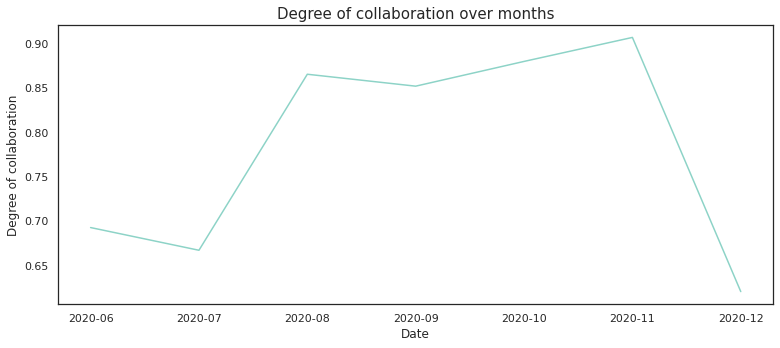

In [ ]:
with plt.style.context({'axes.prop_cycle' : plt.cycler('color', plt.cm.Set3.colors)}):
    plt.figure(figsize=(11,5))
    sns.lineplot(x=deg_colab_pivot['Date'], y=deg_colab_pivot['deg_colab'],
            #hue_order=deg_colab_pivot.sort_values(by=['Date'])['Funding'].tolist(),
            palette='Set2')

    plt.xlabel('Date',fontsize=12)
    plt.ylabel('Degree of collaboration',fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.title('Degree of collaboration over months', fontsize=15)
    plt.tight_layout()
    plt.savefig('deg_colab.pdf')
    plt.show()

# International collab & Research area

In [ ]:
int_colab = data_w_date[['PD','C1']].dropna()
int_colab['C1'] = int_colab['C1'].apply(lambda x: re.sub(r"\[(.*?)\]", "", x).split('; ')).to_list()
int_colab['country_whole']=[list(set(i)) for i in [[j.split()[-1] for j in i] for i in int_colab['C1']]]
int_colab['num_country'] = int_colab['country_whole'].apply(lambda x: len(x))
int_colab.loc[int_colab['num_country']>1, 'num_country'] = 2
int_colab_counts = int_colab.groupby('PD')['num_country'].value_counts().rename_axis(['date','collab']).reset_index(name='Count').pivot(index='date', columns='collab', values='Count').fillna(0).reset_index()
int_colab_counts['percentage']=int_colab_counts[2]/(int_colab_counts[1]+int_colab_counts[2])
int_colab_counts


collab,date,1,2,percentage
0,2020-06,12.0,0.0,0.000000
1,2020-07,3.0,0.0,0.000000
2,2020-08,620.0,208.0,0.251208
3,2020-09,1402.0,393.0,0.218942
4,2020-10,245.0,82.0,0.250765
5,2020-11,27.0,16.0,0.372093
6,2020-12,37.0,13.0,0.260000


In [ ]:
ra_sm = data_w_date[['PD','SC']].dropna()
ra_sm['SC'] = ra_sm['SC'].str.split(';')
ra_sm['cnt'] = ra_sm['SC'].apply(lambda x: len(x))

ra_sm.loc[ra_sm['cnt']>1, 'cnt'] = 2
ra_sm_counts = ra_sm.groupby('PD')['cnt'].value_counts().rename_axis(['date','ra']).reset_index(name='Count').pivot(index='date', columns='ra', values='Count').fillna(0).reset_index()
ra_sm_counts['percentage']=ra_sm_counts[2]/(ra_sm_counts[1]+ra_sm_counts[2])
ra_sm_counts

ra,date,1,2,percentage
0,2020-06,12.0,1.0,0.076923
1,2020-07,3.0,0.0,0.000000
2,2020-08,762.0,143.0,0.158011
3,2020-09,1292.0,628.0,0.327083
4,2020-10,184.0,150.0,0.449102
5,2020-11,9.0,34.0,0.790698
6,2020-12,43.0,7.0,0.140000


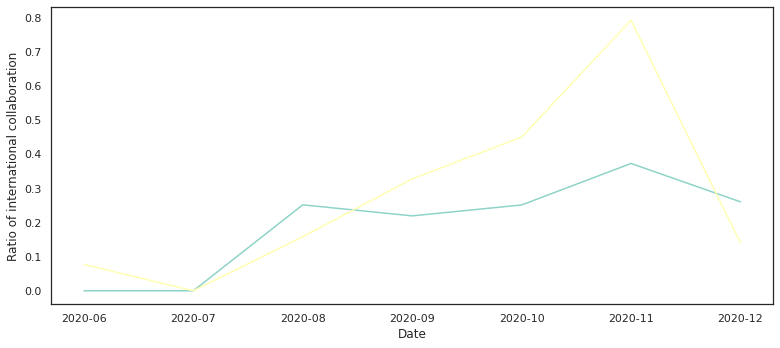

In [ ]:
with plt.style.context({'axes.prop_cycle' : plt.cycler('color', plt.cm.Set3.colors)}):
    plt.figure(figsize=(11,5))
    sns.lineplot(x=int_colab_counts['date'], y=int_colab_counts['percentage'],
            #hue_order=deg_colab_pivot.sort_values(by=['Date'])['Funding'].tolist(),
            palette='Set2')
    sns.lineplot(x=ra_sm_counts['date'], y=ra_sm_counts['percentage'],
            #hue_order=deg_colab_pivot.sort_values(by=['Date'])['Funding'].tolist(),
            #palette='Set2'
                )
    plt.xlabel('Date',fontsize=12)
    plt.ylabel('Ratio of international collaboration',fontsize=12)

    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    #plt.title('Ratio of international collaboration over months', fontsize=15)
    plt.tight_layout()
    plt.savefig('int_colab_ratio.pdf')
    plt.show()

In [ ]:
sum_tb = data[['SC', 'NR', 'Z9']].dropna().reset_index(drop=True)
sum_tb['SC'] = sum_tb['SC'].str.split(';')
sum_tb_full = sum_tb.explode('SC')
sum_tb_full['cnt']=1
sum_group = sum_tb_full.groupby('SC').sum()
sum_group['Cited Reference Count per']=sum_group['NR']/sum_group['cnt']
sum_group['Times Cited per']=sum_group['Z9']/sum_group['cnt']
sum_group.sort_values(by=['Times Cited per'], ascending=False).head(20)

,NR,Z9,cnt,Cited Reference Count per,Times Cited per
SC,,,,,
Environmental Sciences & Ecology,7315,502,165,44.333333,3.042424
Water Resources,217,21,7,31.000000,3.000000
Medical Laboratory Technology,884,66,28,31.571429,2.357143
"Radiology, Nuclear Medicine & Medical Imaging",1959,210,100,19.590000,2.100000
Integrative & Complementary Medicine,33,2,1,33.000000,2.000000
Linguistics,295,22,13,22.692308,1.692308
Pathology,444,28,17,26.117647,1.647059
Endocrinology & Metabolism,166,6,4,41.500000,1.500000
Genetics & Heredity,366,13,9,40.666667,1.444444


In [ ]:
sum_country = data[['C1', 'NR', 'Z9']].dropna().reset_index(drop=True)
sum_country['C1'] = sum_country['C1'].apply(lambda x: re.sub(r"\[(.*?)\]", "", x).split('; ')).to_list()
sum_country['country_whole']=[list(set(i)) for i in [[j.split()[-1] for j in i] for i in sum_country['C1']]]                                                      
sum_country_full = sum_country.explode('country_whole').drop(columns='C1')
sum_country_full['num']=1
sum_country_g = sum_country_full.groupby('country_whole').sum()
sum_country_g['Cited Reference Count per'] = sum_country_g['NR']/sum_country_g['num']
sum_country_g['Times Cited per'] = sum_country_g['Z9']/sum_country_g['num']
sum_country_g.sort_values(by=['Times Cited per'], ascending=False).head(20)


,NR,Z9,num,Cited Reference Count per,Times Cited per
country_whole,,,,,
Kazakhstan,18,18,1,18.000000,18.000000
Estonia,142,7,2,71.000000,3.500000
Brunei,23,4,2,11.500000,2.000000
Netherlands,4082,172,117,34.888889,1.470085
Korea,2275,94,74,30.743243,1.270270
France,6545,263,232,28.211207,1.133621
Wales,772,29,28,27.571429,1.035714
Salvador,33,1,1,33.000000,1.000000
Finland,808,19,20,40.400000,0.950000


# Networkx

In [ ]:
def to_network(matrix):
    unik=[]
    for i in matrix:
        for j in i:
            unik.append(j)
    keys=list(set(unik))

    dicti={}
    for key in keys:
        value=[]
        for sublist in matrix:
            if key in sublist:
                li = list(sublist)
                li.remove(key)
                value=value+list(set(li))        
        dicti[key]=value
        
    G = nx.Graph()
    for key, value in dicti.items():
        for i in list(value):
            G.add_edge(key, i, weight = value.count(i))       
    return G

In [ ]:
matrix_author = list(data_author['AF'])
matrix_inst = list(data_inst['C1'])
country_mtx_df = [i for i in [[j.split()[-1] for j in i] for i in data_country['C1']]] 
matrix_ra = list(data_research['SC'])
nw_author = to_network(matrix_author)
nw_institute = to_network(matrix_inst)
nw_country = to_network(country_mtx_df)
nw_ra = to_network(matrix_ra)

In [ ]:
matrix_kwd = [[i.lower() for i in j ]for j in data_keywords.DE]
nw_kwd = to_network(matrix_kwd)

# Centrality author

In [ ]:
def centrality(G):
    largest_cc = max(nx.connected_components(G), key=len)
    S = G.subgraph(largest_cc).copy()   
    bet_cen = nx.betweenness_centrality(S)
    pagerank = nx.pagerank(S)
    betweeness = pd.DataFrame(sorted(bet_cen.items(), key=lambda item: item[1], reverse=True), columns=['Name','betweeness']).reset_index(drop=True)
    pgrk = pd.DataFrame(sorted(pagerank.items(), key=lambda item: item[1], reverse=True), columns=['Name','pagerank']).reset_index(drop=True)
    return pd.merge(betweeness,pgrk,on='Name',how='outer').sort_values(by=['betweeness','pagerank'], ascending=False).head(10)

In [ ]:
centrality(nw_author)

,Name,betweeness,pagerank
0,"Liu, Yong",0.397993,0.001354
1,"Wang, Jian",0.308860,0.001540
2,"Chen, Bing",0.231298,0.000452
3,"Wang, Lin",0.230480,0.000963
4,"Cowling, Benjamin J.",0.215185,0.000844
5,"Zhao, Jincun",0.214119,0.000705
6,"Wang, Liang",0.160027,0.000466
7,"Luo, Hong",0.158147,0.000413
8,"Li, Mei",0.155657,0.000465
9,"Yang, Lin",0.149951,0.000810


In [ ]:
nx.number_connected_components(nw_author)

3709

In [ ]:
[len(c) for c in sorted(nx.connected_components(nw_author), key=len, reverse=True)][:10]

[3329, 267, 249, 181, 154, 115, 101, 99, 96, 96]

# Centrality institute

In [ ]:
centrality(nw_institute)

,Name,betweeness,pagerank
0,Harvard Med Sch,0.067859,0.004915
1,Univ Oxford,0.052188,0.003293
2,Univ Milan,0.037140,0.002720
3,UCL,0.036892,0.002936
4,Kings Coll London,0.036622,0.002986
5,Univ Toronto,0.035465,0.003462
6,Johns Hopkins Univ,0.033062,0.002428
7,Monash Univ,0.027257,0.002758
8,Univ Padua,0.025104,0.002538
9,Univ Paris,0.024587,0.001892


In [ ]:
nx.number_connected_components(nw_institute)

441

In [ ]:
[len(c) for c in sorted(nx.connected_components(nw_institute), key=len, reverse=True)][:10]

[5909, 11, 11, 10, 8, 7, 7, 7, 7, 7]

# Centrality contry

In [ ]:
centrality(nw_country)

,Name,betweeness,pagerank
0,USA,0.133012,0.107025
1,England,0.093765,0.061495
2,Australia,0.058476,0.032514
3,France,0.042786,0.029573
4,Canada,0.040152,0.029292
5,Brazil,0.036718,0.019946
6,Africa,0.035912,0.013303
7,Italy,0.035554,0.052377
8,Spain,0.034336,0.028528
9,China,0.033157,0.043278


In [ ]:
nx.number_connected_components(nw_country)

8

In [ ]:
[len(c) for c in sorted(nx.connected_components(nw_country), key=len, reverse=True)]

[128, 1, 1, 1, 1, 1, 1, 1]

# Co-author

In [ ]:
pd.DataFrame(sorted(nw_author.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:20])

,0,1,2
0,"Diamond, Michael S.","Chen, Rita E.",{'weight': 5}
1,"Favaloro, Emmanuel J.","Lippi, Giuseppe",{'weight': 4}
2,"Alter, Galit","Schmidt, Aaron G.",{'weight': 4}
3,"Frere, Corinne","Laforge, Mireille",{'weight': 4}
4,"Frere, Corinne","Becker, Chrystel",{'weight': 4}
5,"Frere, Corinne","Elbim, Carole",{'weight': 4}
6,"Frere, Corinne","Benoliel, Jean-Jacques",{'weight': 4}
7,"Frere, Corinne","Nuss, Philippe",{'weight': 4}
8,"Frere, Corinne","Hemadi, Miryana",{'weight': 4}
9,"Frere, Corinne","Massaad, Charbel",{'weight': 4}


In [ ]:
nx.number_of_edges(nw_author)

171198

In [ ]:
nx.number_of_selfloops(nw_author)

6

In [ ]:
nx.number_of_nodes(nw_author)

29255

In [ ]:
#isolated nodes
len(set([i for j in matrix_author for i in j]))-nx.number_of_nodes(nw_author)

653

# co-occur institutions


In [ ]:
pd.DataFrame(sorted(nw_institute.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:20])

,0,1,2
0,Huazhong Univ Sci & Technol,Huazhong Univ Sci & Technol,{'weight': 34}
1,Univ Toronto,Univ Toronto,{'weight': 30}
2,Harvard Med Sch,Harvard Med Sch,{'weight': 28}
3,Wuhan Univ,Wuhan Univ,{'weight': 28}
4,Univ Oxford,Univ Oxford,{'weight': 22}
5,Icahn Sch Med Mt Sinai,Icahn Sch Med Mt Sinai,{'weight': 19}
6,Harvard Med Sch,Massachusetts Gen Hosp,{'weight': 19}
7,UCL,UCL,{'weight': 15}
8,Univ Tehran Med Sci,Univ Tehran Med Sci,{'weight': 15}
9,Univ Melbourne,Univ Melbourne,{'weight': 14}


In [ ]:
nx.number_of_selfloops(nw_institute)

1366

In [ ]:
nx.number_of_edges(nw_institute)

41726

In [ ]:
nx.number_of_nodes(nw_institute)

6918

In [ ]:
#isolated nodes
len(set([i for j in matrix_inst for i in j]))-nx.number_of_nodes(nw_institute)

403

# node: country

In [ ]:
pd.DataFrame(sorted(nw_country.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:20])

,0,1,2
0,USA,USA,{'weight': 1005}
1,China,China,{'weight': 451}
2,Italy,Italy,{'weight': 415}
3,England,England,{'weight': 319}
4,India,India,{'weight': 191}
5,France,France,{'weight': 154}
6,Australia,Australia,{'weight': 154}
7,Spain,Spain,{'weight': 144}
8,Canada,Canada,{'weight': 129}
9,Germany,Germany,{'weight': 116}


In [ ]:
nx.number_of_selfloops(nw_country)

101

In [ ]:
nx.number_of_edges(nw_country)

1843

In [ ]:
nx.number_of_nodes(nw_country)

135

In [ ]:
len(set([i for j in country_mtx_df for i in j]))-nx.number_of_nodes(nw_country)

3

# co-occurrence of research area

In [ ]:
pd.DataFrame(sorted(nw_ra.edges(data=True),key= lambda x: x[2]['weight'],reverse=True))[:20]

,0,1,2
0,Social Sciences - Other Topics,Medical Ethics,{'weight': 60}
1,Social Issues,Biomedical Social Sciences,{'weight': 52}
2,Immunology,Infectious Diseases,{'weight': 50}
3,Biochemistry & Molecular Biology,Cell Biology,{'weight': 49}
4,Social Issues,Medical Ethics,{'weight': 49}
5,Social Issues,Social Sciences - Other Topics,{'weight': 49}
6,Biomedical Social Sciences,Medical Ethics,{'weight': 49}
7,Biomedical Social Sciences,Social Sciences - Other Topics,{'weight': 49}
8,Hematology,Cardiovascular System & Cardiology,{'weight': 43}
9,Oncology,"Radiology, Nuclear Medicine & Medical Imaging",{'weight': 41}


In [ ]:
nx.number_of_edges(nw_ra)

567

In [ ]:
nx.number_of_selfloops(nw_ra)

0

In [ ]:
nx.number_connected_components(nw_ra)

1

In [ ]:
[len(c) for c in sorted(nx.connected_components(nw_ra), key=len, reverse=True)]

[189]

In [ ]:
nx.number_of_nodes(nw_ra)

189

In [ ]:
#isolated nodes
len(set([i for j in matrix_ra for i in j]))-nx.number_of_nodes(nw_ra)

32

# author keyword co-occurrence

In [ ]:
pd.DataFrame(sorted(nw_kwd.edges(data=True),key= lambda x: x[2]['weight'],reverse=True))[:20]

,0,1,2
0,covid-19,sars-cov-2,{'weight': 568}
1,covid-19,coronavirus,{'weight': 283}
2,covid-19,pandemic,{'weight': 217}
3,sars-cov-2,coronavirus,{'weight': 117}
4,coronavirus,pandemic,{'weight': 65}
5,covid-19,mortality,{'weight': 52}
6,covid-19,anxiety,{'weight': 41}
7,covid-19,mental health,{'weight': 39}
8,covid-19,depression,{'weight': 39}
9,sars-cov-2,pandemic,{'weight': 38}


In [ ]:
len(max(nx.connected_components(nw_author), key=len))

3329

In [ ]:
largest_cc = max(nx.connected_components(nw_author), key=len)
S = nw_author.subgraph(largest_cc).copy()
nx.average_shortest_path_length(S)

8.105404574023153

In [ ]:
import math
math.log(len(max(nx.connected_components(nw_author), key=len)))

8.110427237575024